# DATA DESCRIPTION

The dataset used for this project is available on  kaggle https://www.kaggle.com/volodymyrgavrysh/bank-marketing-campaigns-dataset
The data is about a bank's marketing campaign that offers clients a term deposit in the bank. The company approched it's clients mostly by telephone and a target variable was assigned according to the client answers yes for offer acceptance and no otherwise.

The dataset has 41188 rows, 21 columns that is 20 independent variables and target variable y (yes or no)





In [100]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Import Packages necessary for analysis

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

View of the dataset and its contents

In [102]:
Campaign_analysis= pd.read_csv(r"bank-additional-full.csv",sep=';')
Campaign_analysis.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [103]:
Campaign_analysis.info()
Campaign_analysis.describe()
Campaign_analysis.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


(41188, 21)

In [104]:
Campaign_analysis.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [105]:
Campaign_analysis.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [106]:
Campaign_analysis.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

No missing valuesin the dataset as shown above

Drill down: What are distinct values in selected columns 

In [107]:
Campaign_analysis['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [108]:
Campaign_analysis['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

How many clients subscribed to the term and how many didn't. 
The distribution of Yes and No's in form of a bargraph

In [109]:
Campaign_analysis['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

<AxesSubplot:>

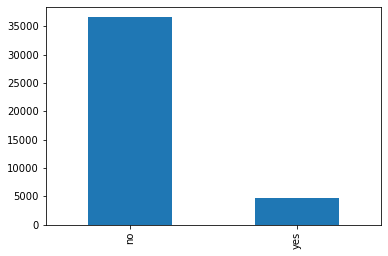

In [110]:
Campaign_analysis['y'].value_counts().plot(kind='bar')

Establish the relationship amongst numeric variables to detect multicolinariety

The correlationship among data variables/ How do they relate to each other
Show the correlationship on a heatmap below

In [111]:
Campaign_analysis.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


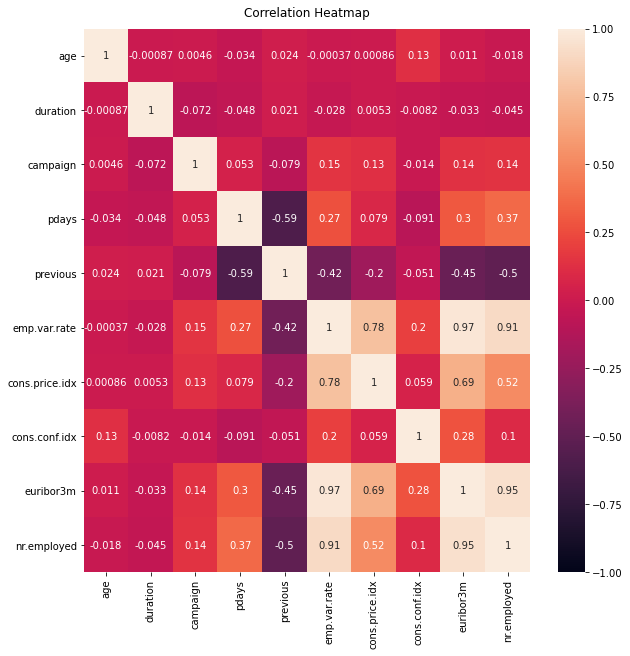

In [112]:
plt.figure(figsize=(10,10))
heatmap =sns.heatmap(Campaign_analysis.corr(),vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Correlation for categorical variables
Below will note that consumers employed for admin jobs has a higher probability to subscribe to the term representing approx 29.13%

In [113]:
pd.crosstab(Campaign_analysis.marital, Campaign_analysis.y)

y,no,yes
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [114]:
pd.crosstab(Campaign_analysis.month, Campaign_analysis.y)

y,no,yes
month,,
apr,2093,539
aug,5523,655
dec,93,89
jul,6525,649
jun,4759,559
mar,270,276
may,12883,886
nov,3685,416
oct,403,315


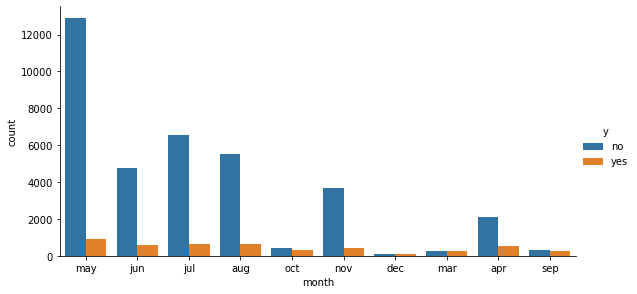

In [115]:
sns.catplot(x='month',hue='y',kind='count',size=4,aspect=2, data=Campaign_analysis)

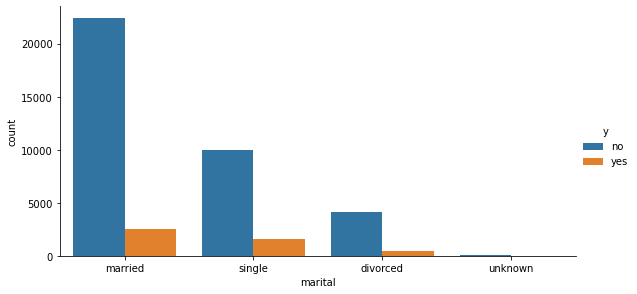

In [116]:
sns.catplot(x='marital',hue='y',kind='count', size=4,aspect=2, data=Campaign_analysis)

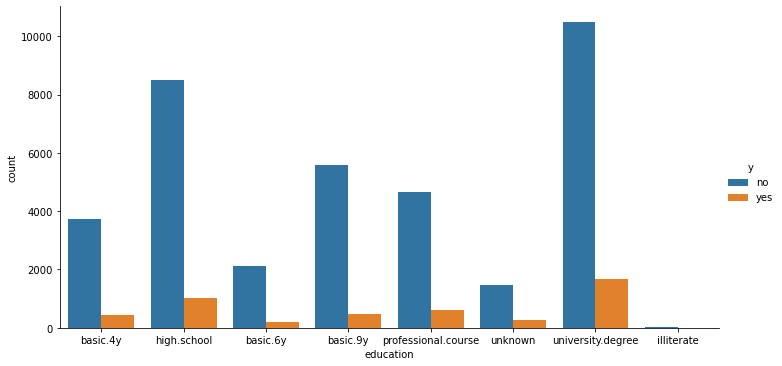

In [117]:
sns.catplot(x='education',hue='y',size=5,aspect=2, kind='count',data=Campaign_analysis)

NULL values check 

In [118]:
Campaign_analysis.apply(lambda x: sum(x.isnull().values), axis = 0)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Missing values check

In [119]:
Campaign_analysis.replace(r'unknown', np.nan, inplace = True)

In [120]:
Campaign_analysis.apply(lambda x: sum(x.isnull().values), axis = 0) 

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [121]:
def drop(column):

     Campaign_analysis[column].replace('unknown', np.nan, inplace=True)
     Campaign_analysis.dropna(inplace=True)

drop('job')
drop('marital')
drop('education')
drop('housing')


In [122]:
if Campaign_analysis['job'].str.contains('unknown').any():
    print ("unkown is there")
else:
    print('unkown not there')

unkown not there


Below is the distribution of age among consumers. worthy to note majority of these consumers are in their 30's and it tends to follow a normal distribution 

<Figure size 576x432 with 0 Axes>

<AxesSubplot:xlabel='age', ylabel='Density'>

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of age among consumers')

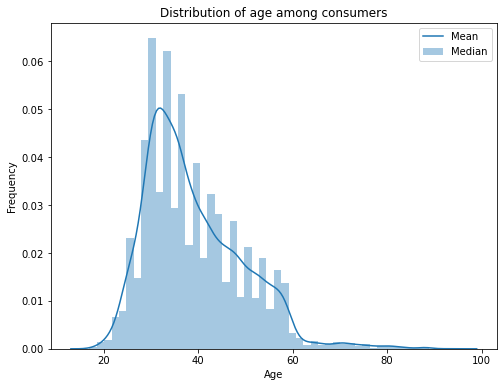

In [123]:
plt.figure(figsize=(8,6))
sns.distplot(Campaign_analysis.age)
mean=Campaign_analysis['age'].mean()
median=Campaign_analysis['age'].median()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of age among consumers')
plt.legend({'Mean':mean,'Median':median})

In [124]:
mean, median

(39.03001180792443, 37.0)

In [125]:
Campaign_analysis

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Data Preposessing:

Before applying the model we did some data preposing

In [126]:
preprocess = Campaign_analysis.copy()

In [127]:
preprocess.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [128]:
category_features = ['job','marital','education','housing','loan','month','day_of_week','poutcome']
preprocess[category_features].head()

,job,marital,education,housing,loan,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,may,mon,nonexistent
2,services,married,high.school,yes,no,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,may,mon,nonexistent
4,services,married,high.school,no,yes,may,mon,nonexistent
6,admin.,married,professional.course,no,no,may,mon,nonexistent


In [129]:
preprocess_one_hot = pd.get_dummies(preprocess, columns = category_features)
preprocess_one_hot = pd.get_dummies(preprocess_one_hot, columns = ['y'],drop_first=True)


In [130]:
#the responses 'yes' & 'no' are almost similarly distributed so dropping this column
preprocess_one_hot.drop(columns=['contact'],inplace=True)

In [131]:
preprocess_one_hot = preprocess_one_hot.drop('default',axis=1)
preprocess_one_hot.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
6,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0


# Model Building and Evaluation

Modeling:

In [132]:
from sklearn.preprocessing import StandardScaler

bank_one_hot_data = preprocess_one_hot.copy()
X = bank_one_hot_data.drop(columns=['y_yes'])
y = bank_one_hot_data['y_yes']
ssc = StandardScaler(with_mean=True,with_std=True)
ssc.fit_transform(X)

array([[ 1.64225272,  0.00579232, -0.55933525, ..., -0.35785071,
         0.4243334 , -0.20162497],
       [-0.19645225, -0.12794351, -0.55933525, ..., -0.35785071,
         0.4243334 , -0.20162497],
       [ 0.09386958, -0.41452029, -0.55933525, ..., -0.35785071,
         0.4243334 , -0.20162497],
       ...,
       [ 1.64225272, -0.26932139, -0.19170249, ..., -0.35785071,
         0.4243334 , -0.20162497],
       [ 0.48096537,  0.69739761, -0.55933525, ..., -0.35785071,
         0.4243334 , -0.20162497],
       [ 3.38418375, -0.0782702 ,  0.17593026, ...,  2.79446144,
        -2.3566375 , -0.20162497]])

In [133]:
X.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'],
  

Train Test Split : First we start with splitting the data into training and testing.

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Decision Tree Classifier 

In [138]:
# ML model Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

import warnings
warnings.filterwarnings('ignore')

In [139]:
ds_tree_entropy = DecisionTreeClassifier
(criterion='entropy',random_state=42)
ds_tree_entropy.fit(X_train,y_train)
ds_tree_entropy_y_pred = ds_tree_entropy.predict(X_test)
ds_tree_entropy_y_pred

SyntaxError: invalid syntax (<ipython-input-139-4da0c5eeb648>, line 2)

In [140]:
predict_dataframe = pd.DataFrame(data={"Predicted": ds_tree_entropy_y_pred, "Actual": y_test})

predict_dataframe

,Predicted,Actual
30881,0,0
17283,0,0
40803,1,1
10961,1,0
3964,0,0
...,...,...
27474,0,0
41054,1,1
21969,0,0
29892,0,0


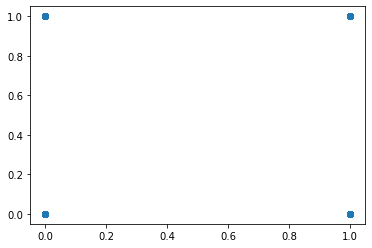

In [141]:
plt.scatter(y_test, ds_tree_entropy_y_pred)

In [142]:
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,ds_tree_entropy_y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,ds_tree_entropy_y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,ds_tree_entropy_y_pred, pos_label = 1))
print('Precision score for "No"' , metrics.precision_score(y_test,ds_tree_entropy_y_pred, pos_label = 0))
print('Recall score for "Yes"' , metrics.recall_score(y_test,ds_tree_entropy_y_pred, pos_label = 1))
print('Recall score for "No"' , metrics.recall_score(y_test,ds_tree_entropy_y_pred, pos_label = 0))

Model Entropy - no max depth
Accuracy: 0.8791407018694654
Balanced accuracy: 0.7275745914338547
Precision score for "Yes" 0.5070785070785071
Precision score for "No" 0.9334711520390904
Recall score for "Yes" 0.5267379679144385
Recall score for "No" 0.9284112149532711


In [143]:
from sklearn import tree

from sklearn.metrics import r2_score,mean_squared_error

mse = mean_squared_error(y_test, ds_tree_entropy_y_pred)
mse

0.1208592981305346

In [144]:
### Calculate RMSE of Decision Tree

rmse_des = np.sqrt(mse)
rmse_des

0.3476482390729667


# Logistic Regression
Logistic Regression is one of the most popular Machine Learning Algorithms, used in the case of predicting various categorical datasets.
For the best fit of categorical datasets, a Curve is being required which is being possible with the help of Logistic Regression, as it uses a Sigmoid function to make predictions.



In [145]:
#import keras
#import tensorflow.keras as keras
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import matplotlib.pyplot as plt

In [146]:
logreg = LogisticRegression()
log_reg = LogisticRegression(max_iter=3500).fit(X_train,y_train)
print(log_reg.score(X_test,y_test)) #Logistic Regression score 91 accuracy

0.9035749426041325


In [147]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=3500)

In [148]:
print(log_reg.coef_)

[[ 2.81087227e-04  4.66965570e-03 -6.65901024e-02 -1.41301413e-03
  -6.20207069e-02 -4.13305162e-01  3.32796650e-01  8.41404448e-04
  -1.09919315e-01 -6.44390583e-03 -1.56754027e-03 -2.44165695e-01
  -3.71221442e-02 -2.03962606e-03 -4.95709232e-02  2.55342813e-01
   9.30342543e-03 -9.46224039e-02  1.85202969e-01  2.64968297e-02
  -4.40339861e-02 -5.96998597e-02 -9.88752384e-03  7.28111018e-02
  -6.81076705e-02 -1.21337602e-02 -9.27076375e-02 -1.52719752e-02
   1.40947675e-02  7.31123485e-02  1.04237646e-01  1.69495428e-02
  -1.37258245e-02  5.40276491e-02 -5.08039309e-02 -8.02843193e-02
   2.82714040e-01  3.57886486e-02  2.90155953e-01  1.27331029e-01
   6.40346774e-01 -1.02339933e+00 -2.12048729e-01  1.93077321e-02
  -7.66880783e-02 -3.12799397e-02 -2.24450731e-01  1.49133675e-02
   1.02148426e-01  1.41892595e-01 -2.50817612e-01  1.42871858e-01
   1.11169472e-01]]


In [149]:
predictions = log_reg.predict(X_test)

In [150]:
metrics.mean_absolute_error(y_test, predictions)

17.507379468678256

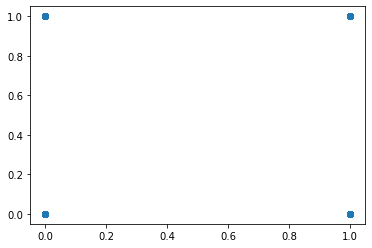

In [151]:
plt.scatter(y_test, predictions)

MSE is a risk function, corresponding to the expected value of the squared error loss. The fact that MSE is almost always strictly positive (and not zero) is because of randomness or because the estimator does not account for information that could produce a more accurate estimate.The MSE assesses the quality of a predictor (i.e., a function mapping arbitrary inputs to a sample of values of some random variable), or an estimator (i.e., a mathematical function mapping a sample of data to an estimate of a parameter of the population from which the data is sampled).

In [152]:
rmse_log = np.sqrt(metrics.mean_squared_error(y_test, predictions))
rmse_log

0.3105238435223091

# Support Vector Machine
Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.


In [153]:
vector = svm.LinearSVC(dual = False).fit(X_train,y_train)
print(vector.score(X_test,y_test))

0.902755001639882


In [154]:
pred = vector.predict(X_test)
pred

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

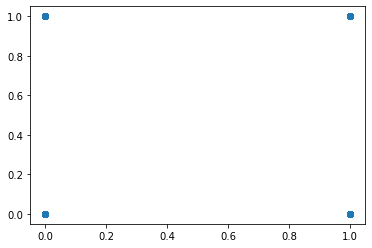

In [155]:
plt.scatter(y_test, pred)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

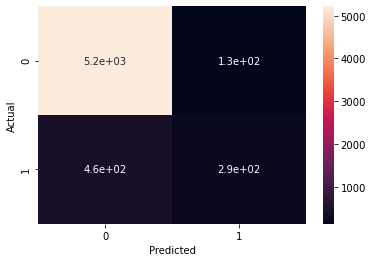

In [156]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [157]:
metrics.mean_absolute_error(y_test, pred)

19.34093145293539

In [158]:
mse_svm = metrics.mean_squared_error(y_test, pred)
mse_svm

0.09724499836011807

In [159]:
rmse_svm = np.sqrt(mse_svm)
rmse_svm

0.3118413031657578

For evaluating all the modls built. AUC Score is the better criteria than the accuracy score. The final model is selected based on highest outof sample mean AUC Score. Suhail will refine this more.


In [160]:
# Function that returns False positive rate and true positive rate in arrays
def AUC(model):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict(X_test))
    return fpr,tpr

0.7047003848268278


<Figure size 432x288 with 0 Axes>

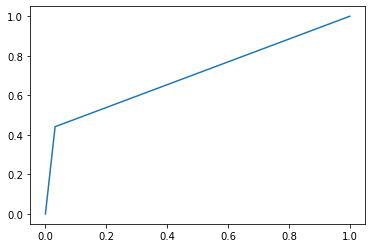

In [161]:
#testing AUC for Log Reg
fpr, tpr = AUC(log_reg)
print(metrics.auc(fpr, tpr))
y=(metrics.auc(fpr, tpr))
plt.figure()
plt.plot(fpr,tpr)

0.6789334799340297


<Figure size 432x288 with 0 Axes>

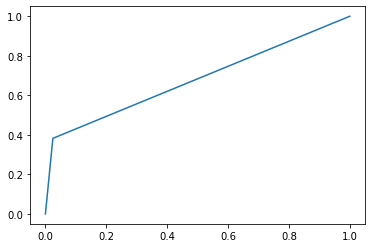

In [162]:
#testing AUC for SVM
fpr, tpr = AUC(vector)
x=(metrics.auc(fpr, tpr))
print(metrics.auc(fpr, tpr))
plt.figure()
plt.plot(fpr,tpr)

0.7275745914338548


<Figure size 432x288 with 0 Axes>

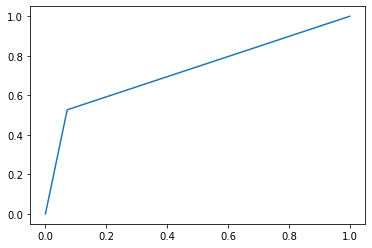

In [163]:
#testing AUC for decision tree
fpr, tpr = AUC(ds_tree_entropy)
z=(metrics.auc(fpr, tpr))
print((metrics.auc(fpr, tpr)))
plt.figure()
plt.plot(fpr,tpr)

# Model Comparison

In [164]:
models=['SVM','Log Regression','Decision Trees']
comp_df = pd.DataFrame(columns = ['RMSE','AUC'],index=models)
comp_df.RMSE['SVM','Log Regression','Decision Trees'] = rmse_svm, rmse_log, rmse_des
comp_df.AUC['SVM','Log Regression','Decision Trees'] = x,y,z
comp_df

,RMSE,AUC
SVM,0.311841,0.678933
Log Regression,0.310524,0.704700
Decision Trees,0.347648,0.727575


The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values. 

Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit. As the square root of a variance, RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. Lower values of RMSE indicate better fit. 

The RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.

The lower the RMSE value, the better the model. So, the Regression model is a better performer in this case.